In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
%matplotlib inline

In [44]:
ds = load_iris()
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
df = pd.DataFrame(ds.data, ds.target, columns=ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds.data, ds.target, train_size=0.8, random_state=42)
print(f'x_train shape: {x_train.shape}, x_test shape: {x_test.shape}')
print(f'y_test shape: {y_train.shape}, y_test shape: {y_test.shape}')

x_train shape: (120, 4), x_test shape: (30, 4)
y_test shape: (120,), y_test shape: (30,)


In [47]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 5.3 KB


In [49]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train, y_train)
print("accuracy on train set {:.2f}".format(clf.score(x_train, y_train)))
print("accuracy on test set {:.2f}".format(clf.score(x_test, y_test)))

accuracy on train set 0.95
accuracy on test set 0.90


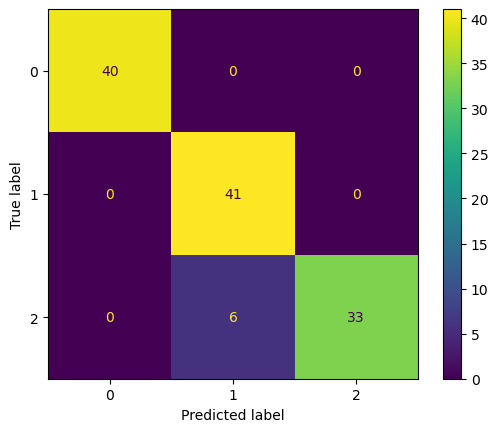

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(x_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [51]:
from imblearn.metrics import specificity_score, sensitivity_score


def show_classification_characteristics(clf, x, y):
    print("accuracy: {:.2f}".format(clf.score(x, y)))
    print("error rate: {:.2f}".format(1 - clf.score(x, y)))
    y_pred = clf.predict(x)
    print("sensitivity")
    print(sensitivity_score(y, y_pred, average=None))
    print("specificity")
    print(specificity_score(y, y_pred, average=None))


show_classification_characteristics(clf, x_train, y_train)

accuracy: 0.95
error rate: 0.05
sensitivity
[1.         1.         0.84615385]
specificity
[1.         0.92405063 1.        ]


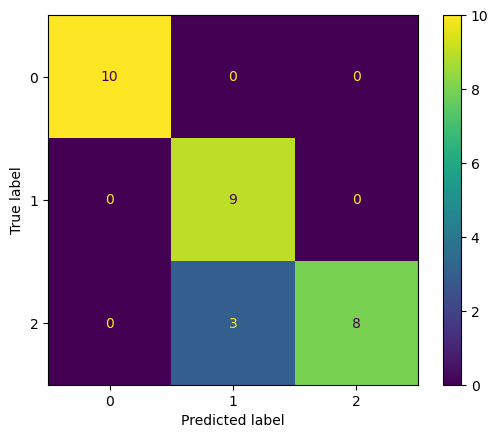

In [52]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [53]:
show_classification_characteristics(clf, x_test, y_test)

accuracy: 0.90
error rate: 0.10
sensitivity
[1.         1.         0.72727273]
specificity
[1.         0.85714286 1.        ]


In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


In [55]:
ds_data = ds.data
ds_data = ds_data[:, :2]
ds_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [56]:
x_train, x_test, y_train, y_test = train_test_split(ds_data, ds.target, train_size=0.8, random_state=42)
print(f'x_train shape: {x_train.shape}, x_test shape: {x_test.shape}')
print(f'y_test shape: {y_train.shape}, y_test shape: {y_test.shape}')

x_train shape: (120, 2), x_test shape: (30, 2)
y_test shape: (120,), y_test shape: (30,)


In [57]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
print("accuracy on train set {:.2f}".format(clf.score(x_train, y_train)))
print("accuracy on test set {:.2f}".format(clf.score(x_test, y_test)))

accuracy on train set 0.67
accuracy on test set 0.63


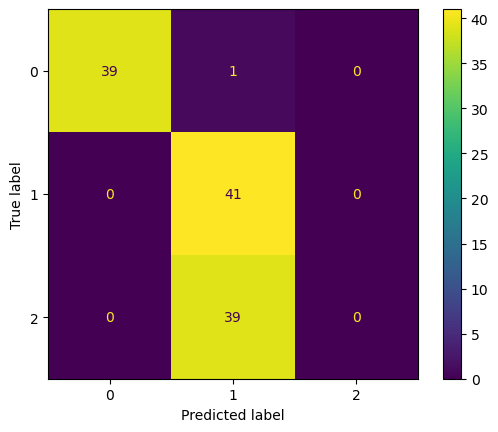

In [58]:
y_pred = clf.predict(x_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [59]:
show_classification_characteristics(clf, x_train, y_train)

accuracy: 0.67
error rate: 0.33
sensitivity
[0.975 1.    0.   ]
specificity
[1.         0.49367089 1.        ]


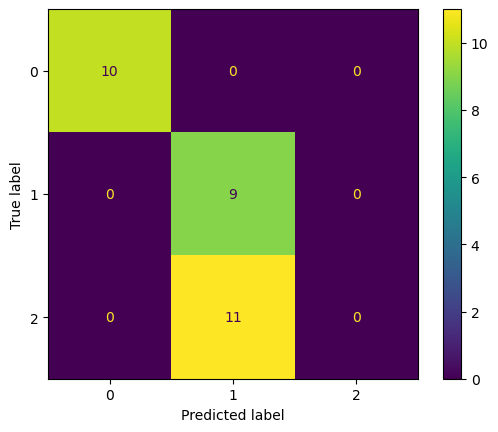

In [60]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [61]:
show_classification_characteristics(clf, x_test, y_test)

accuracy: 0.63
error rate: 0.37
sensitivity
[1. 1. 0.]
specificity
[1.         0.47619048 1.        ]


In [62]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
print("accuracy on train set: {:.2f}".format(clf.score(x_train, y_train)))
print("accuracy on test set: {:.2f}".format(clf.score(x_test, y_test)))

accuracy on train set: 0.94
accuracy on test set: 0.63


[Text(0.5, 0.8333333333333334, 'sepal length (cm) <= 5.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.5, 'sepal width (cm) <= 2.8\ngini = 0.274\nsamples = 44\nvalue = [37, 6, 1]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sepal length (cm) <= 6.15\ngini = 0.536\nsamples = 76\nvalue = [3, 35, 38]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

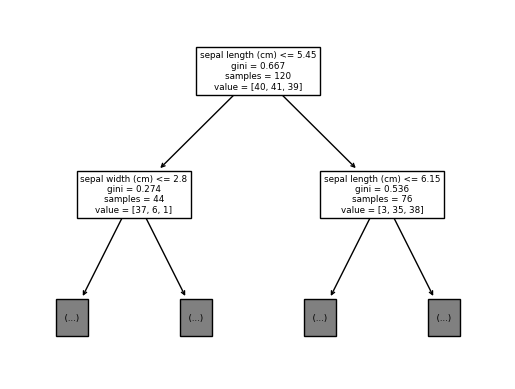

In [63]:
from sklearn import tree

tree.plot_tree(clf, feature_names=ds.feature_names, max_depth=1)

In [64]:
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(x_train, y_train)
print("accuracy on train_set: {:.2f}".format(clf.score(x_train, y_train)))
print("accuracy on test_set: {:.2f}".format(clf.score(x_test, y_test)))

accuracy on train_set: 0.78
accuracy on test_set: 0.90


# Подбор гипер параметров

In [65]:
ds = load_iris()
df = pd.DataFrame(ds.data, ds.target, columns=ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


In [66]:
x_train, x_test, y_train, y_test = train_test_split(ds.data, ds.target, train_size=0.8, random_state=42)

In [67]:
naive_bayes_train_scores = []
naive_bayes_test_scores = []
interval = range(1, 1001)
for alpla in interval:
    clf = MultinomialNB(alpha=alpla / 100.)
    clf.fit(x_train, y_train)
    naive_bayes_train_scores.append(clf.score(x_train, y_train))
    naive_bayes_test_scores.append(clf.score(x_test, y_test))

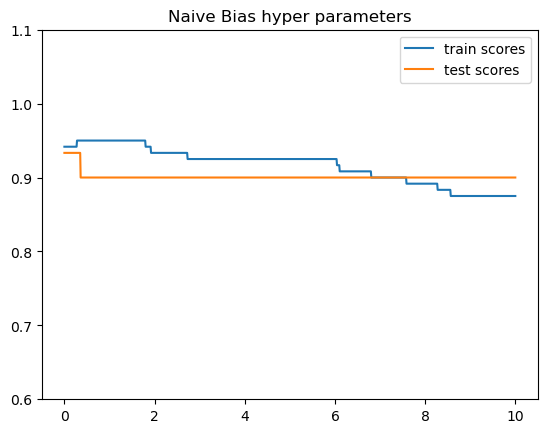

In [68]:
# xs = [x / 100. for x in interval]
xs = np.linspace(0, 10, 1000)
plt.plot(xs, naive_bayes_train_scores, label='train scores')
plt.plot(xs, naive_bayes_test_scores, label='test scores')

plt.title('Naive Bias hyper parameters')
plt.ylim(0.6, 1.1)
plt.legend()

In [69]:
decision_tree_criterias = ['gini', 'entropy', 'log_loss']
decision_tree_idxs = np.linspace(0, 2, 3, dtype=int)
decision_tree_train_scores = []
decision_tree_test_scores = []

for idx in decision_tree_idxs:
    clf = DecisionTreeClassifier(criterion=decision_tree_criterias[idx])
    clf.fit(x_train, y_train)
    decision_tree_train_scores.append(clf.score(x_train, y_train))
    decision_tree_test_scores.append(clf.score(x_test, y_test))

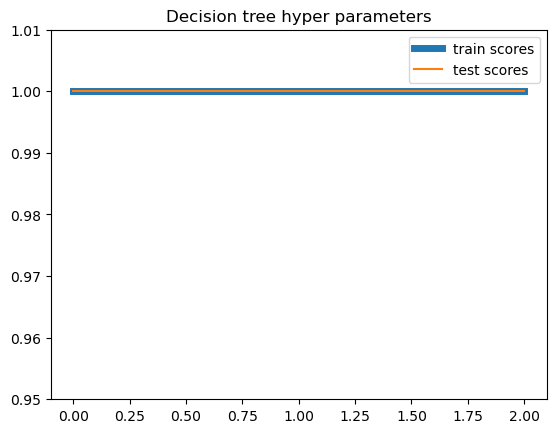

In [74]:
plt.plot(decision_tree_idxs, decision_tree_train_scores, label='train scores', linewidth=5)
plt.plot(decision_tree_idxs, decision_tree_test_scores, label='test scores')

plt.title('Decision tree hyper parameters')
plt.ylim(0.95, 1.01)
plt.legend()

In [75]:
svc_c_parameters = np.linspace(0.1, 10, 100)
svc_train_scores = []
svc_test_scores = []

for i in range(100):
    clf = SVC(C=svc_c_parameters[i])
    clf.fit(x_train, y_train)
    svc_train_scores.append(clf.score(x_train, y_train))
    svc_test_scores.append(clf.score(x_test, y_test))

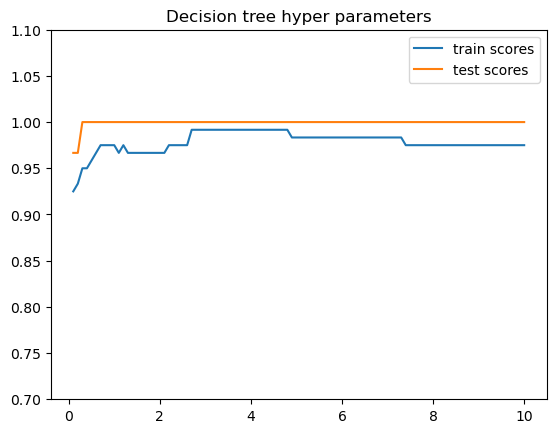

In [76]:
plt.plot(svc_c_parameters, svc_train_scores, label='train scores')
plt.plot(svc_c_parameters, svc_test_scores, label='test scores')

plt.title('Decision tree hyper parameters')
plt.ylim(0.7, 1.1)
plt.legend()